# Assignment 3

In [71]:
import networkx as nx
from networkx.readwrite.gml import read_gml
from networkx.algorithms import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.assortativity import average_degree_connectivity, degree_pearson_correlation_coefficient
from networkx.algorithms.cluster import clustering
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
from scipy.stats import pearsonr, spearmanr, kendalltau


## A03.1

### Utility functions

In [134]:

def plot_centralities(graphs: Dict[str,nx.Graph]):
    degrees = {}
    closenesses = {}
    betweennesses = {}
    eigenvectors = {}
    for key, value in graphs.items():
        degrees[key] = list(degree_centrality(value).values())
        closenesses[key] = list(closeness_centrality(value).values())
        betweennesses[key] = list(betweenness_centrality(value).values())
        eigenvectors[key] = list(eigenvector_centrality(value).values())
        

    plot_scatter(degrees,closenesses,"closeness~degree")
    plot_scatter(degrees,betweennesses,"betweenness~degree")
    plot_scatter(degrees,eigenvectors,"eigenvector~degree")
    plot_scatter(closenesses,betweennesses,"betweenness~closeness")
    plot_scatter(closenesses,eigenvectors,"eigenvector~closeness")
    plot_scatter(eigenvectors,betweennesses,"betweenness~eigenvector")
    
    

def plot_scatter(xs, ys, title: str):
    keys = list(xs.keys())
    fig, axs = plt.subplots(1,3,figsize=(28,10))
    fig.suptitle(title)
    max_x = 0
    min_x = 99
    max_y = 0
    min_y = 0
    for i in range(len(xs)):
        key = keys[i]
        x = xs[key]
        y = ys[key]
        ax = axs[i]

        if max_x < max(x):
            max_x = max(x)
        if max_y < max(y):
            max_y = max(y)

        if min_x > min(x):
            min_x = min(x)
        if min_y > min(y):
            min_y = min(y)

        labels = title.split("~")

        pearson = pearsonr(x, y)
        spearman = spearmanr(x, y)
        kendall = kendalltau(x, y)

        text = f"pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}"
        ax.scatter(x, y)

        ax.set_title(f"{key}")
        ax.set_xlabel(labels[1])
        ax.set_ylabel(labels[0])

        ax.text(0.5,-0.2,text,ha="center",transform=ax.transAxes)

    for ax in axs:
        ax.set_xlim(min_x-0.01,max_x+0.01)
        ax.set_ylim(min_y-0.01,max_y+0.01)
    print(min_x, max_x)
    print(min_y, max_y)
    plt.show()


0.000819000819000819 0.5076142131979695
0 0.6480263157894737


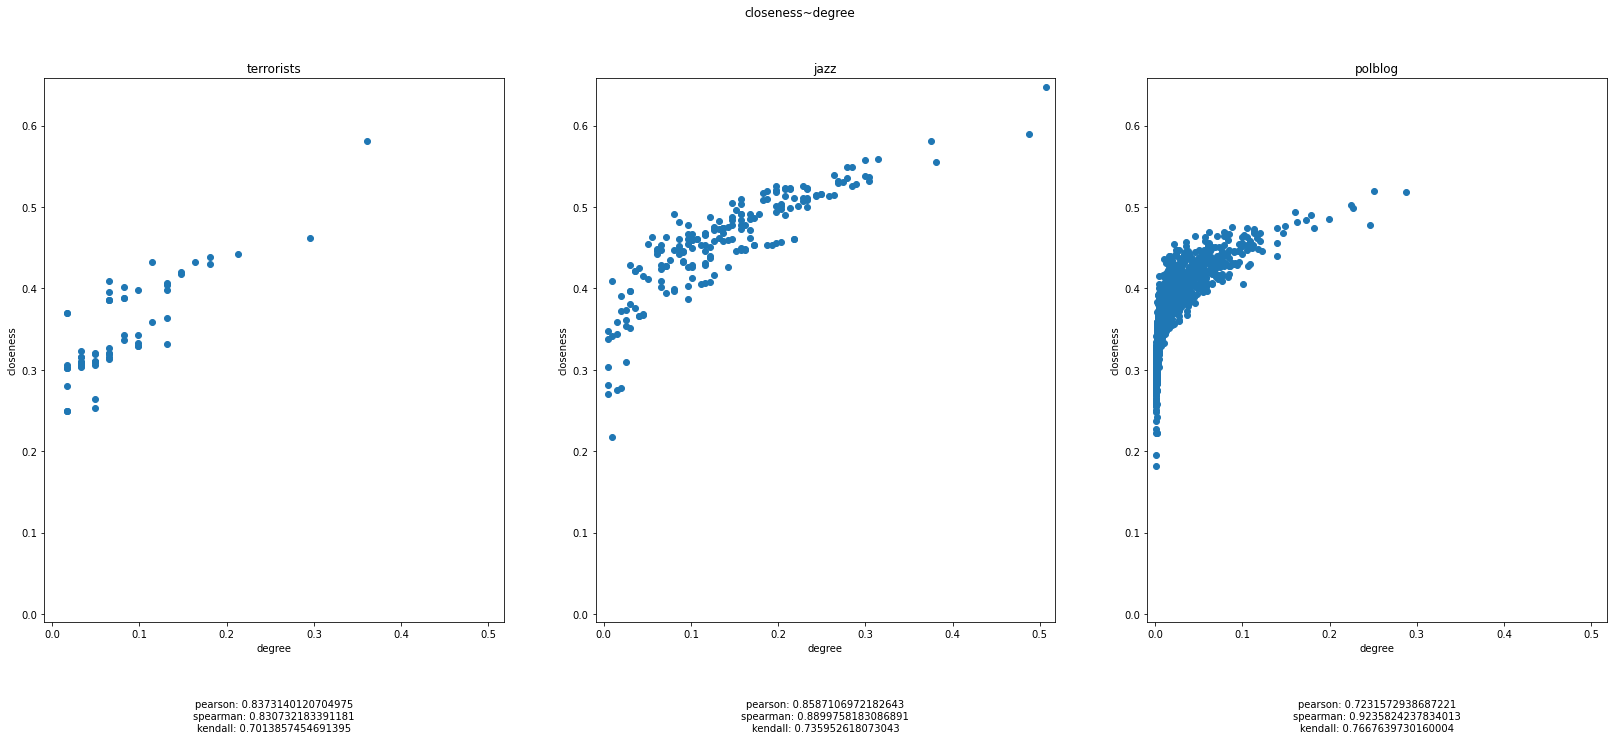

0.000819000819000819 0.5076142131979695
0 0.5870030455276356


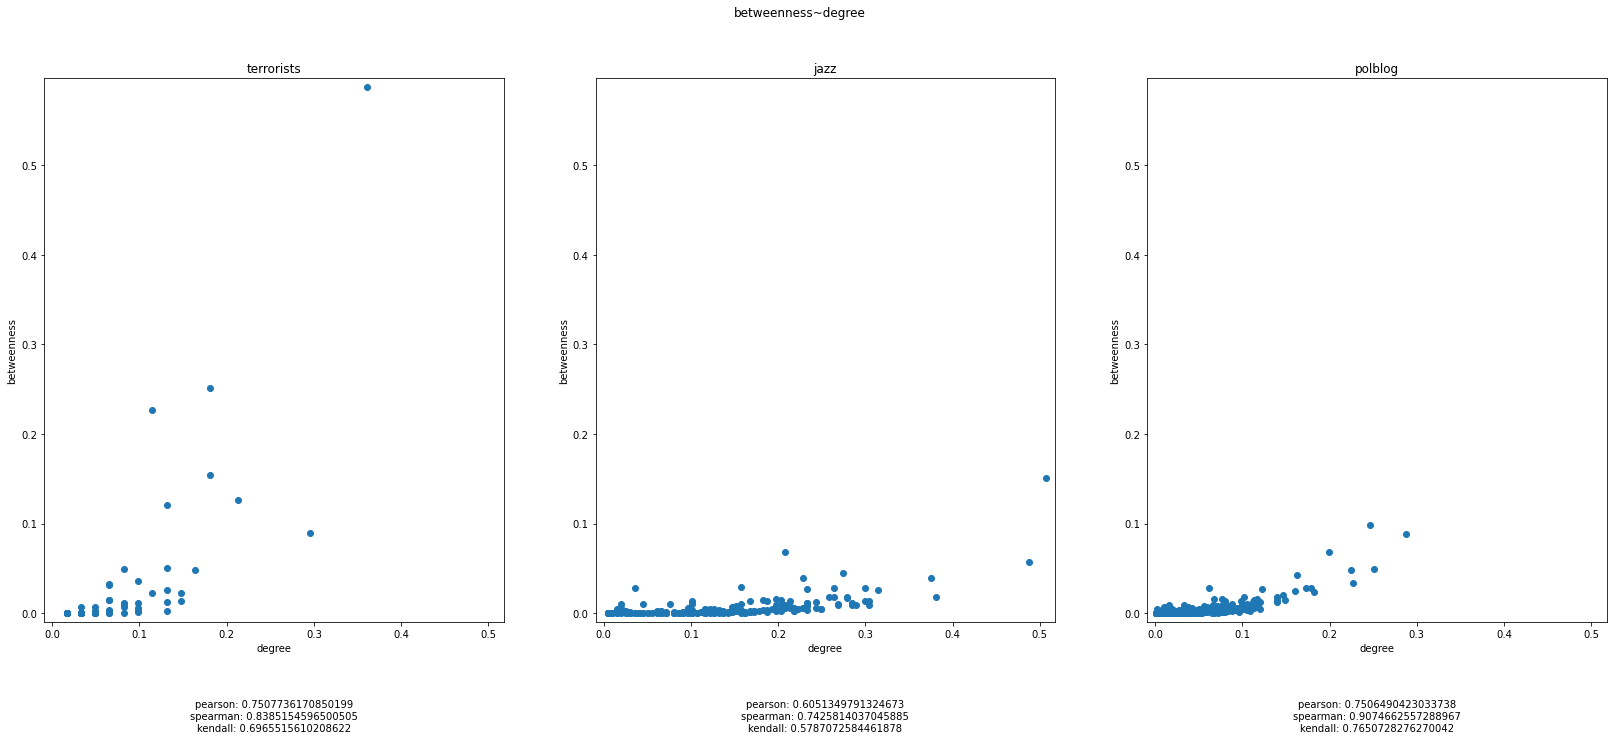

0.000819000819000819 0.5076142131979695
0 0.41250603258459584


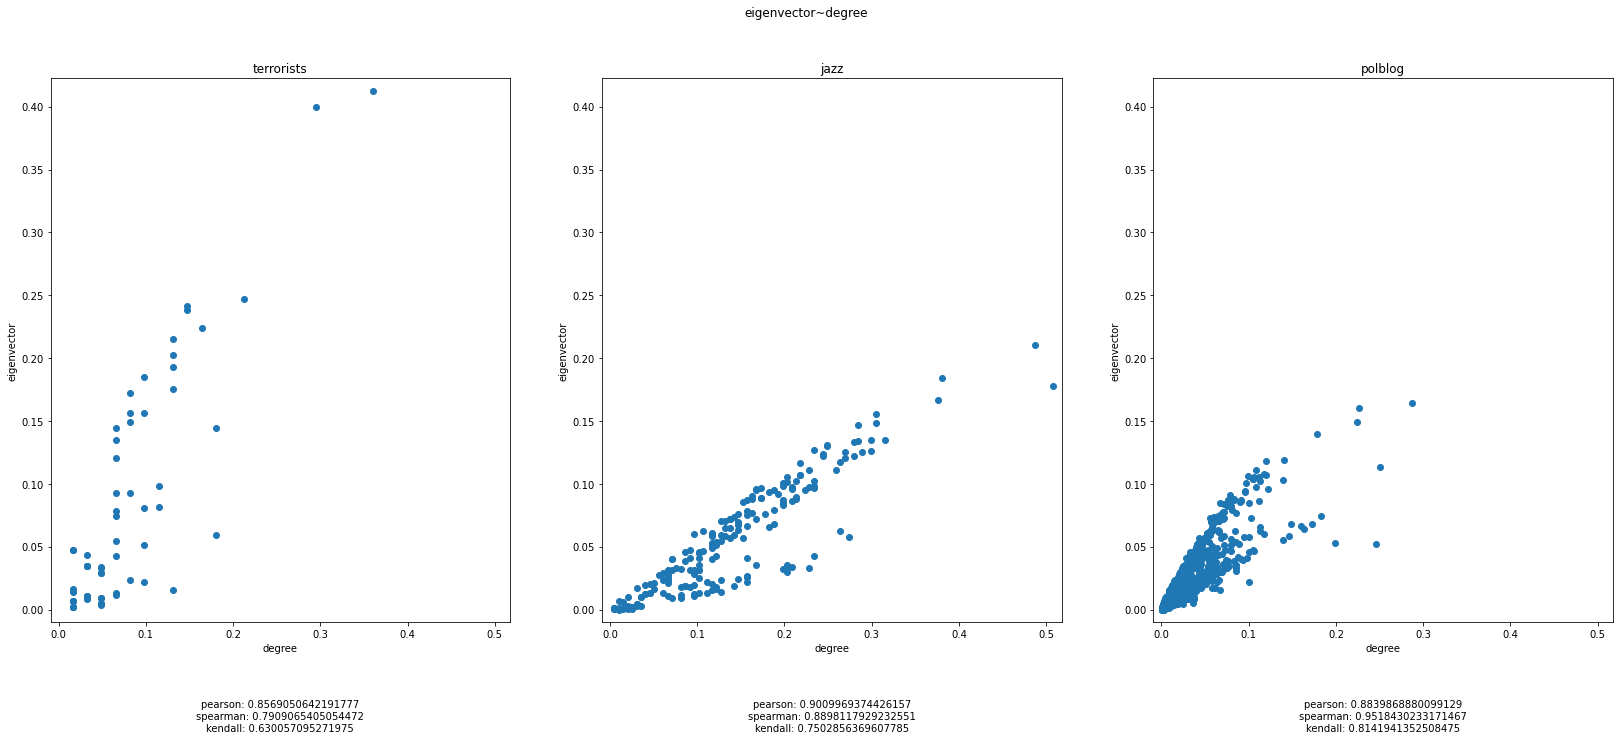

0.18172347075457657 0.6480263157894737
0 0.5870030455276356


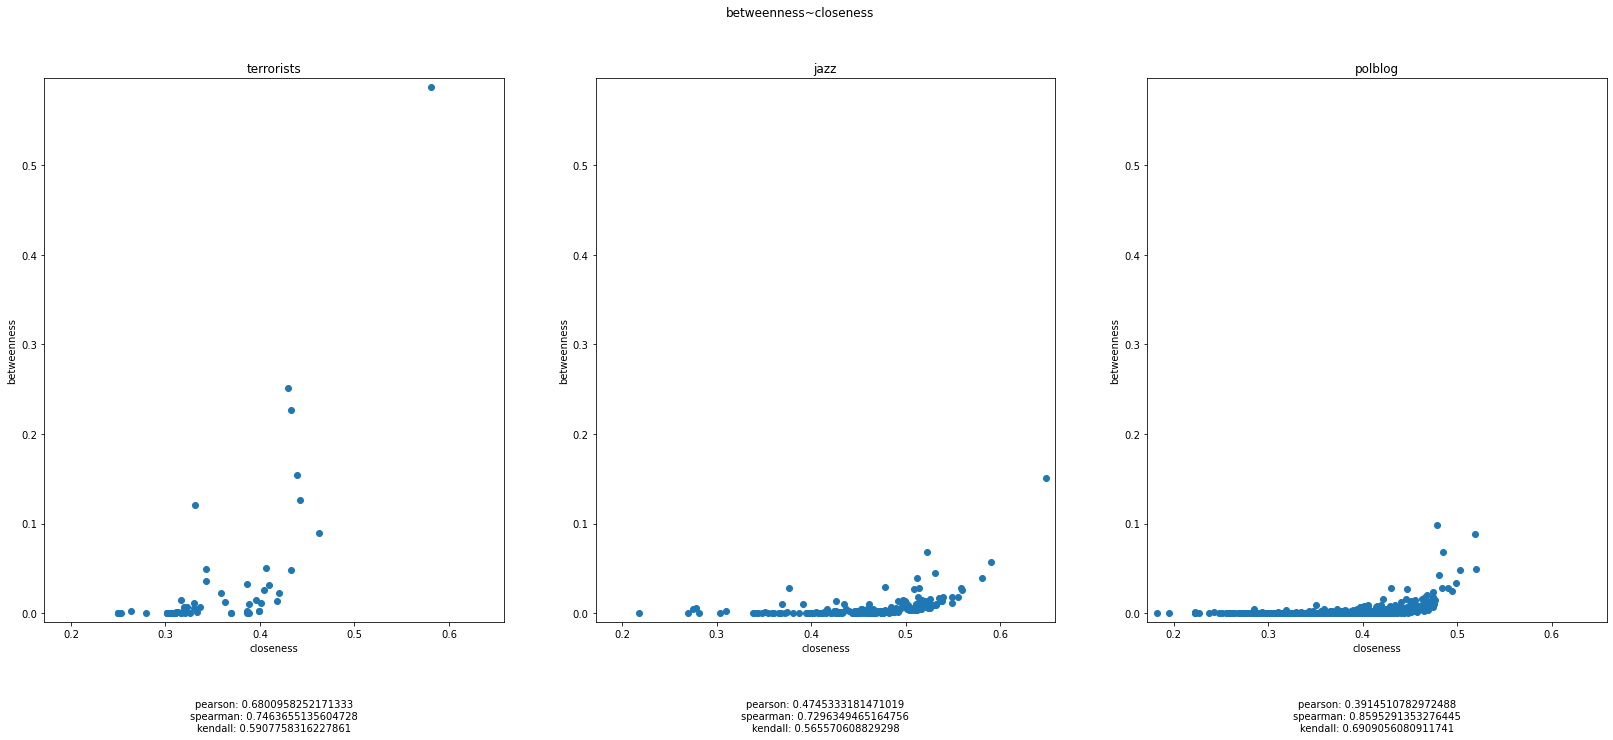

0.18172347075457657 0.6480263157894737
0 0.41250603258459584


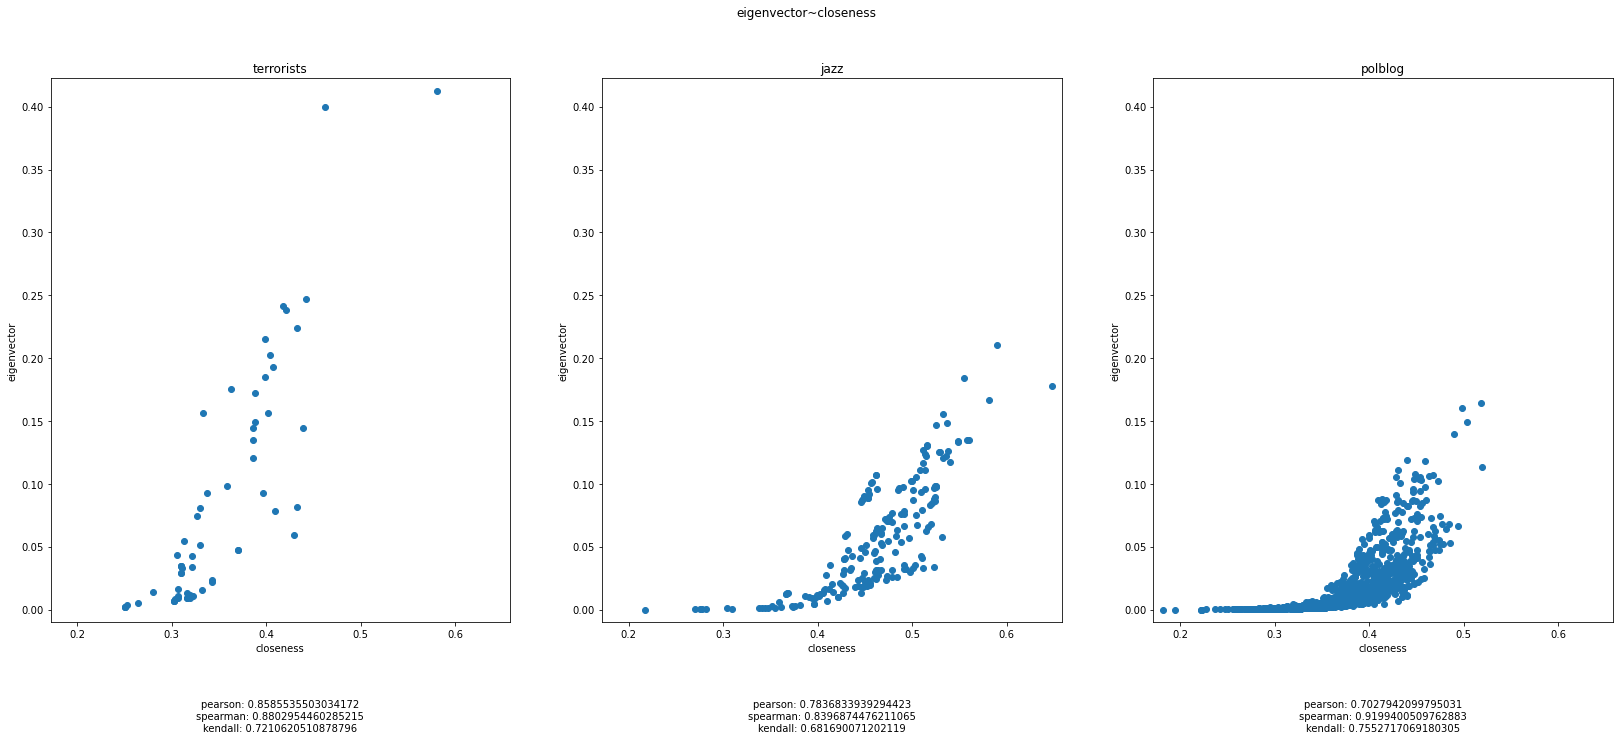

1.5451698984148958e-08 0.41250603258459584
0 0.5870030455276356


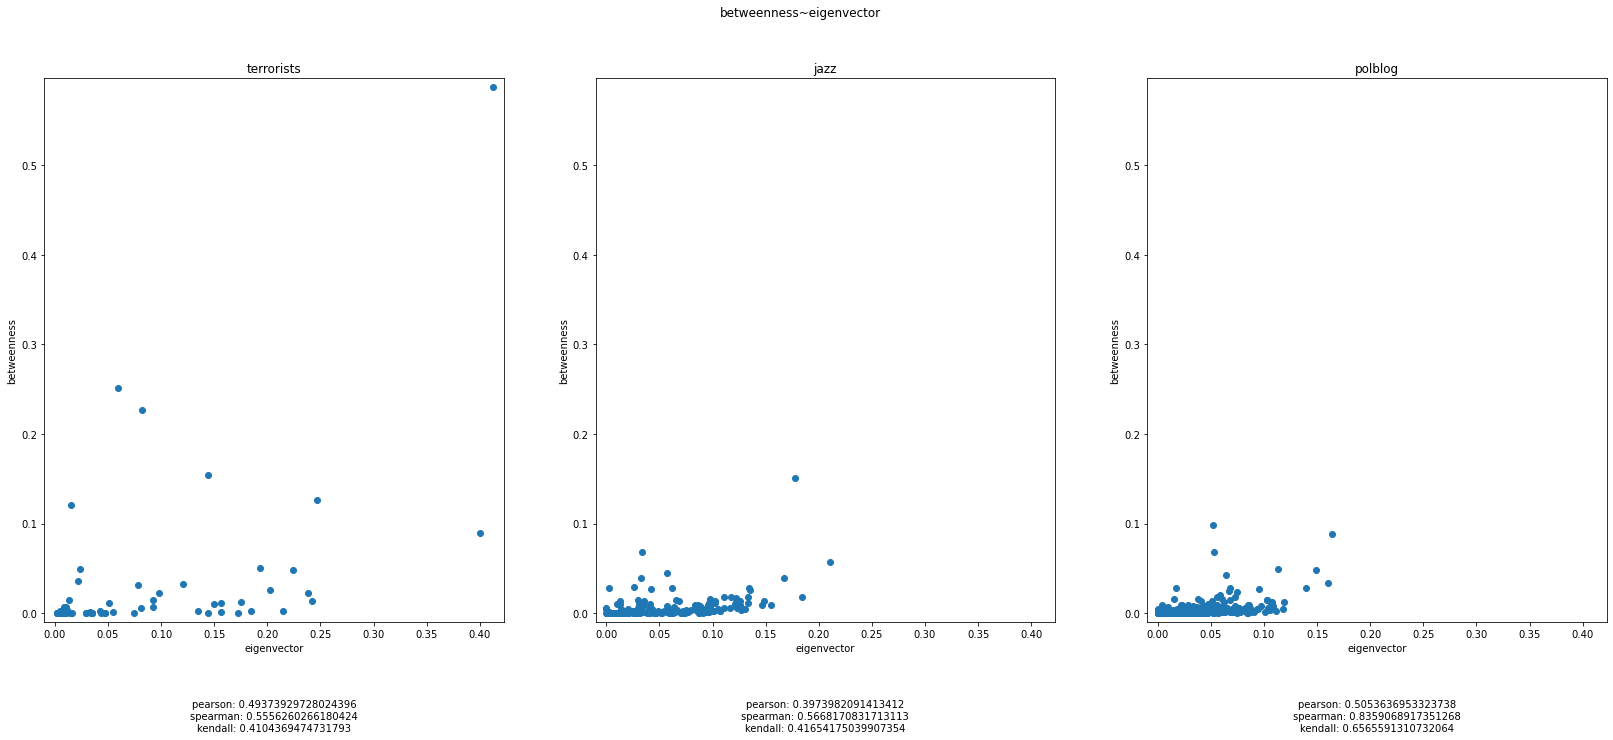

In [121]:
graphs = {}
graphs["terrorists"] = read_gml("data/graph_terrorists.gml")
graphs["jazz"] = read_gml("data/graph_jazz_collab.gml")
graphs["polblog"] = read_gml("data/graph_polblog.gml")
plot_centralities(graphs)

### Jazz discussion

#### I.
Jazz is upon us everywhere. To deny the fact is to assume the classic ostrich pose, head buried in the sand, tail-feathers to the sun. To shout alarm hysterically from the housetops, is to exhibit over-confidence in clamorous indignation as a purifier of morals, if it be not wholly to ignore historic precedent.

The situation we are facing is not new. It offers many problems which are grave, yet seemingly not more perplexing than those which have arisen, under similar conjunctures, in the past. True it is that the dance to which jazz music has been coupled is not precisely setting an example of modesty and grace. True, also, that certain modern dance-perversions have called up music that is as noxious as the breath of Belial. Only by a bold stretch of fancy can this delirious caterwauling be brought under the head of music proper—or improper; as noise, its significance at times becomes eloquent to the point of leaving little or nothing to the imagination.

However, let us remember that the worst of our present dances are not beginning to approach in barefaced wickedness the almost unbelievable performances of our forefathers, for which we need not seek much further back than the time of the French Revolution, when the 1800 dance-halls of Paris were not enough to hold the whirling pairs, but dancing went on gayly in churches and in cemeteries. And let us admit that the best of jazz tunes is something infinitely more original—perhaps even musically better than the so-called “popular” music that America produced in the “good old days,” that golden age which lives only in the mythology of disappointed sinners.

My ideas on the dance and the possible causes of its recurring degeneration I have set forth in an article, “Why do we dance?” which appeared in the Musical Quarterly for October, 1920. I shall merely remind you that almost every race and every age have known social conditions which result in an unloosing of instincts that nature wisely has taught us to hold well in check, but which, every now and then, from cryptic reasons, are allowed to break the bounds of civilized restraint.

Such excesses have not infrequently attained to tragic madness. The silly, lewd gyrations for which jazz is held responsible by some are the release of tension in a witless, neurotic stratum of society. But such dances were common long before the word “jazz” was coined. Our latest dance craze has known the Tango, the “shimmy,” the various zoological trots, to much the same purpose that now cries out for jazz.

Whoever wishes to reform the dance must break the grip that clutches partner against partner, in shuffling, wriggling ambulation. Abolish the comparative intimacy of that twofold company; make room for the benign third party that turns company into crowd; devise a dance in which there is general participation, as there was in the quadrille, the figure dances, the milder forms of country reels, and you will not only improve the tone of public amusements, but possibly you may open a way for dance-music to resume a swifter, ampler, and more sweeping gait, instead of the repeated, jogging, stubborn motives which lead to stupid, short, reiterated movements.

For the present, I am not concerned with dance reform, nor am I interested in jazz as an accompaniment to Terpsichorean atrocities; it is rather the musical side of jazz—how it originated, what it represents, and what it may lead to—upon which I shall try to throw a little light.

#### II.

To a great many minds, the word “jazz” implies frivolous or obscene deportment. Let me ask what the word “sarabande” suggests to you? I have no doubt that to most of you it will mean everything that is diametrically opposed to “jazzing.” When you hear mention of a “sarabande,” you think of Bach's, of Handel's slow and stately airs; you think of noble and dignified strains in partitas, sonatas, and operas of the eighteenth century. Yet the sarabande, when it was first danced in Spain, about 1688, was probably far more shocking to behold than is the most shocking jazz to-day. The sarabande seems to have been of Moorish origin. Then, as now, the oriental, the exotic touch, gave dancing an added fillip. When Lady Mary Montagu, writing from Adrianople in 1717, described the dance that she saw in the seraglio of a rich Mussulman, she made allusions which leave no uncertainty as to the exact nature of these proceedings. Something of that character must have belonged to the earliest sarabandes. They were the proud Hidalgo's hoolah-hoolah.

A French author, Pierre de Lancre, wrote in 1613: “The courtesans who mingle with the players have given this dance such a vogue on the stage, that there is hardly a young girl in the country who cannot copy them to perfection.” How truly the same might be said of our generation; it is the stage that starts a novel mode of dancing, the public which is alert to ape it and outstep it. Father Mariana, in his book De Spectaculis, published in 1609, devoted a whole chapter to an attack on the sarabande, accusing it of having done more harm than the bubonic plague which devastated Europe in the Middle Ages.

FROM OUR AUGUST 1922 ISSUE
Check out the full table of contents and find your next story to read.

See More
Again, we hear it alleged that the moral corruption worked by jazz is vastly more calamitous than was the material havoc wrought by the World War. And yet, as we know, this once objectionable sarabande finally became a matrix wherein the greatest musical composers have cast some of their loftiest and purest inspirations. Dances, popular and no doubt shocking in their day, have furnished the soil for the cyclic growth from which has sprung, by way of the concerto and sonata, the grandest form of absolute music, the orchestral symphony.

What the waltz was when first it set Vienna spinning, when it turned Paris into one big whirlpool, has been variously chronicled by pious and blushing witnesses, none of whom was more perturbed than the impious poet, Lord Byron.

Not soft Herodias, when, with winning tread,
Her nimble feet danced off another's head;
Not Cleopatra on her Galley's deck
Displayed so much of leg or more of neck,
Than thou, ambrosial Waltz.

Yet Weber was to vest such bareness in the spacious mantle of his art, and Chopin crown it with the coronet of quality.

I have taken the license of rapidly rehearsing these few historical facts, to answer those who might question my saneness in bestowing upon the musical side of jazz so much as a particle of studious thought. Without speculating what the future development of jazz may be, what ultimate contribution to musical styles it may make, there is an excuse for believing that long after the dance known as jazz will happily have vanished, investigators in the field of musical history will have occasion to search for the inception of these peculiar tunes, to seek for traces of contemporary opinion on their merit or their faults. I frankly think that it would set us down a rather jaundiced lot, if those investigators were to discover no sign of unbiased appraisement, nothing but wholesale ranting against a laxity of morals which was inveterate before the frenzied beaters of pots and kitchen kettles became entitled to full membership in the Musical Union.

Let me emphatically state that I in no way sympathize with these perpetrators of infernal din, who are giving a poor imitation of the admirable savage, with his highly perfected and astonishingly diversified art of sounding pulsatile instruments.

The savage stands far above the clownish tricks of rubbing sandpaper, blowing shrieky sirens, or hitting at random a battery of gongs. The savage is immeasurably more cultured than the person who belabors a piano with his whole body and, thrumming two or three ill-assorted chords, frantically fumbled together in endless and stale repetition, tries to tell you that he is playing jazz. As a matter of fact, he is doing nothing of the kind.

Like any other type of music, jazz can be bad or good. I am not defending bad jazz any more than I would defend a bad ballad or the bad playing of Beethoven. I have no intention of standing up for the insolent plagiarists who misappropriate and disfigure Rimsky-Korsakof, Puccini, and that superlative master, Johann Strauss. One of the most audacious in this little game is said to be a good musician, conductor of a practised band, the son of a respected Supervisor of Music in Public Schools of Denver. (So says the New York Times.) I am certain that the apostle of vulgarization who should try to rewrite Shelley's poems in slang would be broken on the wheel and quartered. And I should be delighted to help set up the punitive machine if musical barbarians were to be similarly executed.

So much, then, to clear the stage, and range into a solid background the protests and restrictions, upon which I shall ask you to fix, from time to time a reassuring glance, while I step to the proscenium and speak my little piece. The burden of it is this: there exists such a thing as good jazz music, and good jazz is a great deal better, and far more harmless, than is a bad ballad or the bad playing of Beethoven. And, if you are open-eyed in surveying our musical tendencies, you cannot pass blindly over the unspeakable riff-raff of our male and female balladists: the “Smile” songs; “Bubble” songs; “Mother,” “Mither,” and “Mammy” songs; the sloppy “Sweetheart” drivel; above all the unpardonable maltreatment of the classics by the multitude of amateurs—offenses infinitely worse than good jazz. And to the latter I now come.

#### III.

Jazz, as a state of mind, is symptom, not malady. Jazz, in the guise of music is both anodyne and stimulant to the afflicted. To the immune, it is an irritant. The term jazz, as applied to music, is rather elastic. It embraces not only the noisy-noisome sort, the jumble-jungle kind, but a type that refines upon and meliorates the racy stuff of wilder species with matter of a distinctly and engagingly musical nature. Good jazz is a composite, the happy union of seemingly incompatible elements. Good jazz is the latest phase of American popular music. It is the upshot of a transformation which started some twenty years ago, and culminated in something unique, unmatched in any other part of the world. Fifteen years ago we had progressed to the insipid “Waltz me around again, Willie,” to the Coon-song and Rag-time factories in the back parlors of the West Twentieth streets of New York. With the period of “Everybody's doing it, doing it, doing it,” about 1912, we reached the short insistent motive which was to usurp the prerogatives of songfulness.

Then, one fine day, in 1915, — or fine night, I should rather say; for, if I remember correctly, it was in the second act of a mildly entertaining operetta, — we were treated to “The Magic Melody.” A young man, gifted with musical talent and unusual courage, had dared to introduce into his tune a modulation which was nothing extraordinary in itself, but which marked a change, a new regime in American popular music. It was just the thing that the popular composer in the making had been warned against by the wise ones as a thing too “high-brow” for the public to accept. They were foolish prophets. The public not only liked it: they went mad over it. And well they might; for it was a relief, a liberation.

Gradually, the courageous young man found imitators more daring than himself. Harmonic richness and variety entered victoriously where stereotyped cadences, barren and threadbare progressions, had reigned ad nauseam. Mind you, I am not setting milestones with the tunes I have named; I merely wish to suggest to you different stages of a continuous evolution, by songs which were typical of each.

I have not given the subject sufficient study to say definitely at what point the course of popular American music took a new turn, but, unless I am very much mistaken, “The Magic Melody,” by Mr. Jerome Kern, was the opening chorus of an epoch. It is not a composition of genius, but it is very ingenious. While it is almost more tuneless than was “Everybody's doing it,” — if that be possible, — and largely adheres to the short, insistent phrase, it stands on a much higher musical plane. Its principal claim to immortality is that it introduces a modulation which, at the time it was first heard by the masses, seized their ears with the power of magic. And the masses, for once, showed excellent judgment.

Mr. Kern subsequently proved to be one of the most fertile, tasteful, and characteristic composers of light music. When he tries to be purely melodic, he is apt to fall back upon cheap sentimentalism, tinged with spurious folk-song color. But his little harmonic device had a hue all its own; and popular parlance decided that it was “blue.”

A veil of mystery covers the first dark deed that went by the name of “Blue.” Forever hidden, perhaps, is the identity of the melancholic culprit who perpetrated it, although stout hearts are ready to cite the man, the place, and the tune. They are not apt, however, to tell you of an ancestral and bona-fide “blue chord,” which Richard Wagner deliberately chose in order to make more graphic the word blau when Tristan, in the beginning of Tristan and Isolde, refers to the green, but distant, shore as shimmering still in a blue haze. That is the sublime instance.

The ridiculous one is the maudlin glissando on ukulele and steel guitar, the tear-duct of popular music. What stainless ears considered a rather weird turn of the melody, a morbid shifting of harmonies, entered the dictionary of professional jargon as “blue note,” or “blue chord.”

I am under the impression that these terms were contemporary with, if they did not precede and foreshadow, the period of our innumerable musical “Blues.” What the uninitiated tried to define by that homely appellation was, perhaps, an indistinct association of the minor mode and dyspeptic intonation with poor digestion; in reality, it is the advent in popular music of something which the textbooks call ambiguous chords, altered notes, extraneous modulation, and deceptive cadence.

The trick had irresistible charm; everybody tried it. It was in the preludes and interludes of the popular songs that the radicals began to break down the old order — that is, in those measures where the voice did not interfere with their freedom. The hackneyed “Till ready” was mercifully dispatched to limbo, and superseded by some dexterous harmonic tricks that not only stood, but demanded and deserved, rehearing. Instead of the traditional sequence of dominant diminished-seventh, and dominant-seventh harmonies—which formed the time-worn transition into the refrain and accompanied the chanted announcement: “when he to her did say,” — there sprang up a diversity of the freshest, most unexpected modulations, which fell upon the ear like drops of evening rain upon a parched and sun-baked soil. The various shades of blue, in which untutored harmonists indulged, ranged all the way from faint cerulean to deep indigo. The last could often be more fittingly compared to mud.

Between the earlier “rag” and the “blues,” there was this distinction: the rag had been mainly a thing of rhythm, of syncopation; the blues were syncopation relished with spicier harmonies. In addition to these two elements of music, rhythm and harmony, the people—who in the beginning had known but one thing: melody fastened upon a primitive and weak harmonic structure of “Barbershop” chords—the people, I say, who had stepwise advanced from melody and rhythms to harmony, lastly discovered counterpoint. And the result of this last discovery is jazz. In other words, jazz is rag-time, plus “Blues,” plus orchestral polyphony; it is the combination, in the popular music current, of melody, rhythm, harmony, and counterpoint.

#### IV.

Each of these four ingredients bears racial features which are unequivocally American. Yet this Americanism is not exclusively a tribal one; it is not content to borrow from the negro, to filch from the Indian. What marks of oriental inflections it shows hail from the Jordan rather than from the Congo River. While the primitive syncopation was taken over from the colored man; while the Semitic purveyors of Broadway “hits” made us an invaluable gift of their more luxurious harmonic sense of the contrapuntal complexity of jazz is something native, born out of the complex, strident present-day American life. Where did you hear, before jazz was invented, such multifarious stirring, heaving, wrestling of independent voices as there are in a jazz orchestra? The saxophone bleats a turgid song; the clarinets turn capers of their own; the violins come forward with an obbligato; a saucy flute darts up and down the scale, never missing the right note on the right choral; the trombone lumberingly slides off on a tangent; the drum and xylophone put rhythmic highlights into these kaleidoscopic shiftings; the cornet is suddenly heard above the turmoil, with good-natured brazenness. Chaos in order, — orchestral technic of master craftsmen, — music that is recklessly fantastic, joyously grotesque, — such is good jazz. A superb, incomparable creation, inescapable yet elusive; something it is almost impossible to put in score upon a page of paper.

For jazz finds its last and supreme glory in the skill for improvisation exhibited by the performers. The deliberately scored jazz tunes are generally clumsy, pedestrian. It is not for the plodding, routine orchestrator to foresee the unexpected, to plan the improbable.

Jazz is abandon, is whimsicality in music. A good jazz band should never play, and actually never does play, the same piece twice in the same manner. Each player must be a clever musician, an originator as well as an interpreter, a wheel that turns hither and thither on its own axis without disturbing the clockwork.

Strange to relate, this orchestral improvisation, which may seem to you virtually impossible or artistically undesirable, is not an invention of our age. To improvise counterpoint was a talent that the musicians in the orchestras of Peri and Monteverdi, three hundred years ago, were expected to possess, and did possess, to such a high degree that the skeleton scores of those operas which have come down to us give but an imperfect idea of how this music sounded when performed.

A semblance of this lost, and rediscovered, art is contained in the music of the Russian and Hungarian gypsies. Just as that music is a riotous improvisation, throbbing with a communicative beat, ever restless in mood, so is jazz. Just as the gypsy players are held together by an identical, inexplicable rhythmic spell, following the leader's fiddle in its harmonic meanderings, each instrument walking in a bypath of its own, so is the ideal jazz band constituted—that is, the jazz band made up of serious jazz artists.

Franz Liszt could give a suggestion of gypsy music on the keyboard. He had a way of playing the piano orchestrally. There are few people who can play jazz on the piano. Jazz, as much as the gypsy dances, depends on the many and contrasting voices of a band, united in a single and spontaneous rhythmic, harmonic, and contrapuntal will.

The playing and writing down of jazz are two different things. When a jazz tune is written on paper, for a piano solo, it loses nine tenths of its flavor. Only the bitter grounds are left. In that form, also, it is not unlike the clavecin music of the seventeenth and eighteenth centuries, of which only the melody was noted over a figured bass, or “ground.”

Jazz, fortunately, can be preserved on phonographic records for our descendants. They will form their own estimate of our enormities. If we had such records of what Scarlatti, Couperin, and Rameau did with their figured bases, we should need fewer realizations, restitutions, and renditions by arranger and deranger. Of the people whom I have heard play jazz on the piano, I can name but two who have impressed me with their uncanny skill with their infallible musicianship. One of them is a young man in Boston who will play you the ten piano sonatas of Scriabin by heart (!), one after the other, and, if you have survived that, will give you some transcendental jazz which, I wager, you will declare eminently more worth-while than all the metaphysical ramblings of Scriabin's “third period.”

My other young friend hails from New York; he is an accomplished player of Chopin and Debussy, yet nowhere quite so much at home as when he seems to grow another pair of hands, is over all the keys at once, and with the touch of wizardry, conjures up tonal jazz spooks that leave you baffled but grinning with delight.

#### V.

Here is something in music that is a more topical, a more comprehensive expression of the modern American spirit, than all our coon songs, our pseudo-Indian wails, the regional songs of a hundred years ago, the tenth-rate imitations of vile English ballads, the imperfect echoes of French impressionism. Good jazz is enjoyed by capital musicians, by men who are neither inordinately immoral nor extravagantly uncultured. It has fascinated European composers like Stravinsky, Casella, Satie, as Debussy was fascinated before them by rag-time. “Golliwog's Cakewalk” and “Minstrels” are works of the purest art, notwithstanding the fact that the essence of their peculiar charm was filtered from the emanations of the music-hall.

Maurice Ravel, last summer, told Mr. Edward Burlingame Hill, who was visiting him, that he considered jazz the only original contribution America had so far made to music. Nor do American composers of repute disdain to try their hand at it. Leo Sowerby, the young Chicagoan, who is the first musical stipendiary to be sent to the American Academy in Rome, has been guilty of sounding the jazz note in his chamber music and in a piano concerto. No less respectable a person than Professor Hill himself, associate professor of music in Harvard University, a man who may be credited with harboring no desire for cheap notoriety, has signed his name to a “Study in Jazz” which Messrs. Pattison and Maier have played in their remarkable recitals for two pianos, and which, arranged for full orchestra, I believe, has been programmed by M. Monteux for the regular concerts of the Boston Symphony. There is frank and appropriate tribute paid to jazz in Mr. John Alden Carpenter's “Krazy Kat” ballet.

What more conclusive evidence could you demand to prove that jazz—good jazz—is not devoid of musical possibilities, not wanting in musical merit? If the fastidious musician succumbs to it, can you blame the people of America and Europe for liking good jazz?

Perhaps some of my hearers have begun to be agitated with wonder whether I am a paid emissary of the “affiliated dance-hall proprietors,” or a hireling of unscrupulous publishers and phonograph companies.

As a matter of fact, in standing up for good jazz I am not making a plea for the deplorable dances of our day; I am not defending the prurient panders of the musical fraternity; I am not absolving the indiscriminate manufacturers of records. Against all three I want to register a loud, emphatic protest. But I cannot rouse myself to such a pitch of virtuous wrath that blindness is the result. Nor will I admit that music, at its worst, can be guilty of all the misdeeds that have been laid to jazz.

Let the reformer sacrifice his days and nights in the noble endeavor to save mankind from the diabolic pitfalls which constantly surround it. For one thing, the champion of righteousness may rely upon the satiety of the public which, sooner or later, is sure to make an end of every “rage,” including jazz dances. It is more than likely that he does rely on it, and therefore is all the more enthusiastic in his reform. He has, however, so far overlooked the powerful assistance that he might derive from bringing into wider prominence the musical and artistic potentialities of jazz. Nothing will help more speedily to lower it in the esteem of the public at large than gently to hint, artfully to suggest, subtly to insinuate, that it may have some vague, remote relation to Art.

If jazz music has any of the gypsy music's fitness for survival, it will leave a trace, unsoiled by memories of indecorum and police raids. Meanwhile, the curious and heretical inquirer may be pardoned for dwelling reflectively upon so odd a case as that presented by the gradual accession of melody, rhythm, harmony, and counterpoint to the leading role in the popular music of America, a process covering barely more than five decades. It has no parallel in musical history, unless we take musical progress as a whole during the last five centuries. Good jazz, once brought into the focus of unclouded criticism, reveals, aside from the grosser features visible to a naked eye in the dark, some finer lineaments, which make it appear justly entitled to the benefit of honest doubt, based—if on nothing else—on the examples of the sarabande, and the waltz.

Of course, someone may interpose that we cannot drive jazz, waltz, and sarabande in one and the same harness; that the musical vehicles of 1922 are as different from those of 1822, or 1722, as is a snorting eight-cylinder automobile from a featherweight Tilbury, or a pompous state-coach drawn by six.

Quite true. Yet some argumentative and jazz-loving person might come along and retort that, while the means and speed of locomotion have changed, human nature has remained stationary, or, at least, much as it always was and will be. Said person might add to our embarrassment by averring that perhaps the real trouble is a momentary shortage in Handels, Webers, Chopins. And how shall we prove him wrong?

## A03.02

### Utility functions

In [132]:
def solve_03_02(graphs: Dict[str,nx.Graph]):
    randomized_graphs = {}
    for key,value in graphs.items():
        randomized_graphs[key] = random_reference(value, connectivity=False)

    centralities = get_centralities(graphs)
    centralities_random = get_centralities(randomized_graphs)
    
    
    #plot_scatter(centralities["degree"],centralities_random["degree"],"degree_rand~degree")
    plot_scatter(centralities["closeness"],centralities_random["closeness"],"closeness_rand~closeness")
    #plot_scatter(centralities["between"],centralities_random["between"],"between_rand~between")
    #plot_scatter(centralities["eigen"],centralities_random["eigen"],"eigen_rand~eigen")

def get_centralities(graphs: Dict[str,nx.Graph]):
    centralities = {}
    centralities["degree"] = {}
    centralities["closeness"] = {}
    centralities["between"] = {}
    centralities["eigen"] = {}
    for key, value in graphs.items():
        #centralities["degree"][key] = list(degree_centrality(value).values())
        centralities["closeness"][key] = list(closeness_centrality(value).values())
        #centralities["between"][key] = list(betweenness_centrality(value).values())
        #centralities["eigen"][key] = list(eigenvector_centrality(value).values())
    return centralities


[0.30198019801980197, 0.4295774647887324, 0.30198019801980197, 0.30198019801980197, 0.3034825870646766, 0.3193717277486911, 0.3160621761658031, 0.3065326633165829, 0.3160621761658031, 0.34269662921348315, 0.3193717277486911, 0.580952380952381, 0.34269662921348315, 0.40939597315436244, 0.32275132275132273, 0.4326241134751773, 0.26406926406926406, 0.33152173913043476, 0.25311203319502074, 0.25, 0.25, 0.25, 0.3160621761658031, 0.3065326633165829, 0.4326241134751773, 0.305, 0.3885350318471338, 0.3860759493670886, 0.3885350318471338, 0.39869281045751637, 0.4178082191780822, 0.4621212121212121, 0.3696969696969697, 0.3696969696969697, 0.3860759493670886, 0.40397350993377484, 0.3333333333333333, 0.3860759493670886, 0.39869281045751637, 0.4066666666666667, 0.4206896551724138, 0.40131578947368424, 0.3961038961038961, 0.4420289855072464, 0.43884892086330934, 0.3096446700507614, 0.2798165137614679, 0.3630952380952381, 0.3588235294117647, 0.3112244897959184, 0.32105263157894737, 0.3370165745856354,

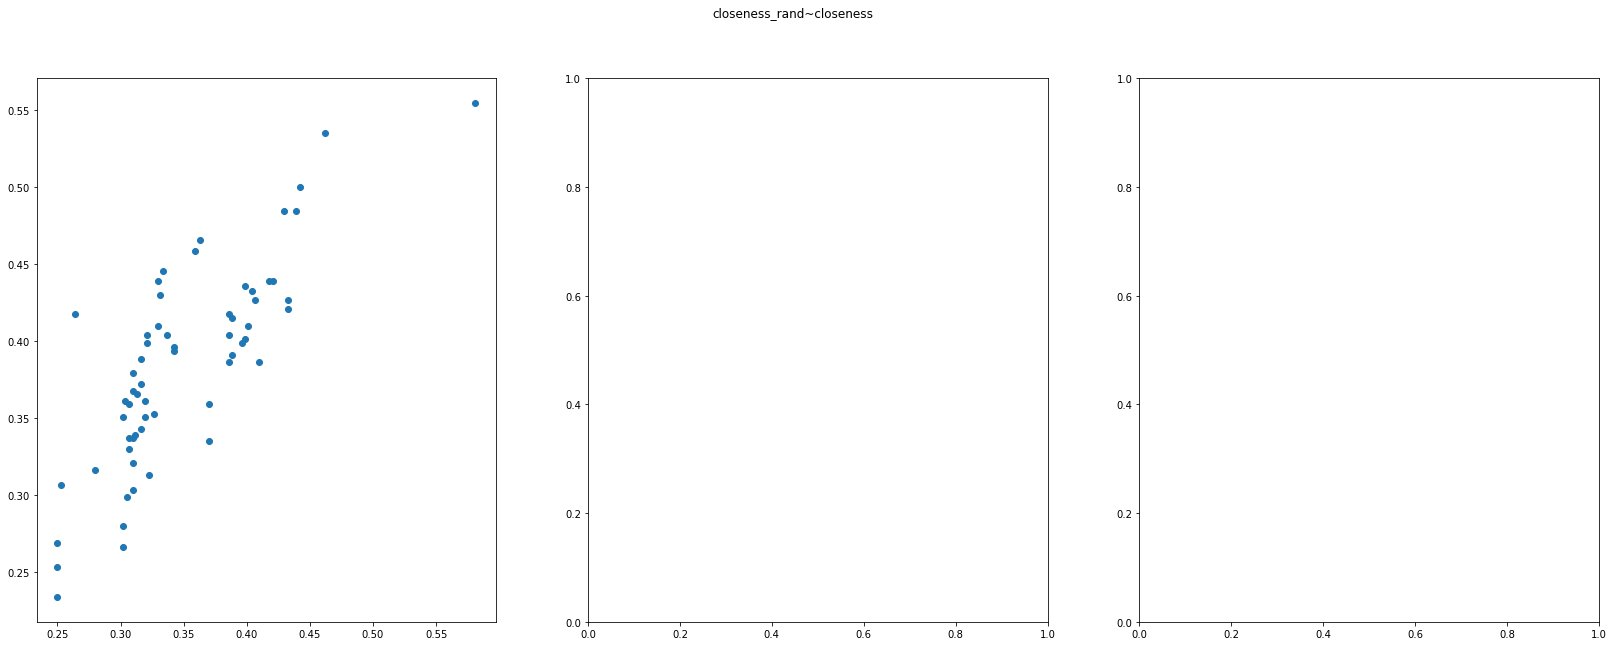

In [133]:
solve_03_02(graphs)

#### Degree centralisation discussion

If we randomise a graph, then the degree of a single node does not change. Therefore the degree centralisation of a randomised graph does not change either.